# Making your server go Brrrrrrrr

## (Multiprocessing & Multithreading)

In [5]:
from IPython.display import HTML
HTML('<video width="600" controls><source src="video.mp4" type="video/mp4"></video>')

# Why is Python Slow?

Python is an interpreted language, which means that under the hood, a program translates it into machine code. This translation can be done using different implementations, such as:

- **CPython** (the standard Python implementation in C)
- **Jython** (Python implemented in Java)
- **Cython** (Python with C extensions for performance)

### So if we're using C++ or Java to compile Python, why is Python still slow?

Even though Python can be implemented in C or Java, it remains slower than languages like C++ or Java because:

1. **Dynamic Typing** – Python determines types at runtime, which adds overhead.
2. **Global Interpreter Lock (GIL)** – CPython's GIL restricts true parallel execution in multi-threaded programs.
3. **Interpreted Execution** – Unlike fully compiled languages, Python runs through an interpreter, adding an extra layer of execution.
4. **Memory Management** – Python's garbage collection and dynamic memory allocation slow down performance.
5. **Abstraction Overhead** – Python prioritizes ease of use over raw performance, leading to additional processing overhead.

To improve Python's speed, you can use techniques like Just-In-Time (JIT) compilation (e.g., PyPy), C extensions (e.g., Cython), or multiprocessing.

# What is the differnece between Concurrency and Parallelism?


![concvsparallel](image.png)

Python is an interpreted language, which means that under the hood, a program translates it into machine code. This translation can be done using different implementations, such as:

- **Concurrency** The ability of a process to execute and switch between functions
- **Parallelism** The ability to spawn two separate processes that execute in isolation from each other

### Parallelism

Parallelism is just hiring two cashiers such that each cashier can process customers isolated from the other cashier 

### Concurrency

Concurrency is the ability of a cashier to serve multiple cutomers where the concurrent model does the following:
1. Cashier tells customer A the amount they need to pay
2. Cashier tells customer B the amount they need to pay
3. Customer A gets the amount they need to pay from their wallet
4. Customer B gets the amount they need to pay from their wallet
5. Customer A pays
6. Customer B pays

Note that steps 2 & 3 can actually happen in parallel since customer A & customer B aren't tied down by a singular resource.

So concurrency model for a resource gives other isolated resources the ability to work in parallel 





# Multiprocessing

![multiprocessing](multiprocessing.jpg)

Multiprocessing is a library in python that allows you to spin multiple processes that work in isolation from each other:
1. They don't share memory
2. They share cores and processing units
3. They work in isolation from each other which means communication between them isn't easy


In [9]:
### CPU Heavy tasks which multiprocessing benefits

import multiprocessing
import time
import math

def calculate_factorial(n):
    """CPU-intensive task that benefits from multiprocessing"""
    return math.factorial(n)

def single_process(numbers):
    start_time = time.time()
    results = [calculate_factorial(num) for num in numbers]
    return time.time() - start_time

def multi_process(numbers):
    start_time = time.time()
    multiprocessing.set_start_method('fork', force=True)
    with multiprocessing.Pool() as pool:
        results = pool.map(calculate_factorial, numbers)
    return time.time() - start_time

if __name__ == "__main__":

    cores = multiprocessing.cpu_count()

    print(f"Number of cores: {cores}")

    numbers = [200000 + i for i in range(cores)]
    
    # Single process
    single_time = single_process(numbers)
    print(f"Single process time: {single_time:.2f} seconds")
    
    # Multi process (using number of CPU cores)
    multi_time = multi_process(numbers)
    print(f"Multi process time: {multi_time:.2f} seconds")

Number of cores: 11
Single process time: 5.65 seconds
Multi process time: 0.89 seconds


Processes:  1, Time: 0.200 seconds
Processes:  2, Time: 0.083 seconds
Processes:  4, Time: 0.051 seconds
Processes:  8, Time: 0.058 seconds
Processes: 16, Time: 0.090 seconds
Processes: 32, Time: 0.145 seconds
Processes: 64, Time: 0.323 seconds


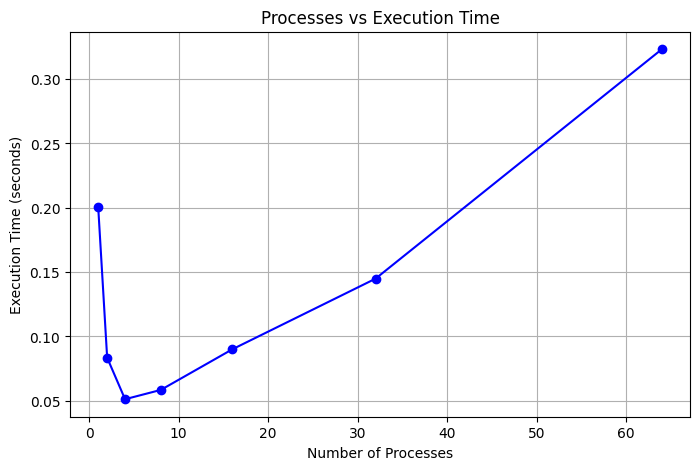

In [18]:
### Should we increase the process pool :)

import multiprocessing
import time
import matplotlib.pyplot as plt

def simple_calculation(x):
    """Lightweight CPU-bound task"""
    return sum(i * i for i in range(x))


def run_with_processes(numbers, num_processes):
    start_time = time.time()
    with multiprocessing.Pool(processes=num_processes) as pool:
        results = pool.map(simple_calculation, numbers)
    return time.time() - start_time


if __name__ == "__main__":
    # Small, quick calculations
    numbers = [10000] * 500  # 500 small tasks

    process_counts = [1, 2, 4, 8, 16, 32, 64]
    durations = []

    for count in process_counts:
        duration = run_with_processes(numbers, count)
        durations.append(duration)
        print(f"Processes: {count:2d}, Time: {duration:.3f} seconds")

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(process_counts, durations, marker="o", linestyle="-", color="b")
    plt.xlabel("Number of Processes")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Processes vs Execution Time")
    plt.grid(True)
    plt.show()

# Context Switching

![context_switching](context_switching.jpg)

### Degree of concurrency

Why is it that the graph between processes and execution time convext?

The CPU has a fixed degree of parallelism (The number of cores in your CPU).

When the number of processes exceed the number of cores they compete for resources leading to context switching between processes which leads to an overhead

### Overhead of context switching

The OS must switch between processes, which involves:

- Saving/restoring registers.

- Cache invalidation (less CPU cache efficiency).

- Additional memory operations.

More processes = more context switching.

# Multithreading

![multithreading_1](multithreading_1.jpg)

The special thing about python is that threads in a single processes aren't parallel they're concurrent.

This means that there is some resource which controls the parallelism of threads and denys them to compete over cores.

![wrong_meme](wrong_meme.jpg)
![right_meme](right_meme.jpg)

### When is multithreading good

We'll get into the whole resource controlling threads in a bit but for now, since they're concurrent,

Q: when is it a good idea to do multithreading.
A: when the actual work isn't happenning on the machine the threads are spun on (e.g API/DB Calls)

In [19]:
### Good threading example

import threading
import time
import requests

URL = "https://jsonplaceholder.typicode.com/todos/1"


def fetch_data(index):
    response = requests.get(URL)  # Simulating network request (I/O-bound)
    print(f"Thread {index}: {response.json()}")


start_time = time.time()

threads = []
for i in range(20):  # Create n threads
    t = threading.Thread(target=fetch_data, args=(i,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()  # Wait for all threads to finish

end_time = time.time()
print(f"Total time: {end_time - start_time:.2f} seconds")

start_time = time.time()
for i in range(20):
    fetch_data(1)
end_time = time.time()

print(f"Time taken for 1 thread: {end_time - start_time:.2f} seconds")


Thread 6: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}Thread 14: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 8: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 10: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 12: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

Thread 9: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 18: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 15: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 0: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 5: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 11: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
Thread 17: {'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'comp

In [2]:
### Bad threading example

import threading
import time


def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True


def count_primes_in_range(start, end):
    count = sum(1 for i in range(start, end) if is_prime(i))
    print(f"Primes in range {start}-{end}: {count}")


ranges = [(10**6, 10**6 + 500000), (10**6 + 5000, 10**6 + 1000000)]

# Without threads (single-threaded)
start = time.time()
for r in ranges:
    count_primes_in_range(*r)
print(f"Time taken without threads: {time.time() - start:.2f} seconds\n")

# With threads
threads = []
start = time.time()
for r in ranges:
    thread = threading.Thread(target=count_primes_in_range, args=r)
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()
print(f"Time taken with threads: {time.time() - start:.2f} seconds")


Primes in range 1000000-1500000: 35657
Primes in range 1005000-2000000: 70067
Time taken without threads: 3.92 seconds

Primes in range 1000000-1500000: 35657
Primes in range 1005000-2000000: 70067
Time taken with threads: 3.91 seconds


# The GIL

![gil](gil.jpg)

The gil which is short for Global interpreter lock is basically a huge lock that restricts threads from running together, i.e it maintains only 1 rule: At any time only 1 thread will be running on the respective process.

But why do we need the GIL?

### Reference counting

How python handles memory management for variables is basically someone declrease a variable 
```python
x = 1
```

After which any decleration of a variable equal to the defined variable basically take a reference from that variable
```python
a = x
b = x
```

So the example above details 3 references for that variable a, b and x.

Now there should be a counter to count the number of references to a variable so that when that variable has no referenes it gets deleted

![ref_counting](ref_counting.png)

Now as with any counter working with threads there needs to be a lock so there are two options:
1. Have a global lock over threads (GIL)
2. Have a lock over each reference counter to disallow race conditions

Note option 2 will for obvious reasons decrease the speed of single threaded programs due to the existence of locks on thread level which are most of python programs which is why option 1 is the better option in general.


In [22]:
#reference counting

import ctypes

var1 = [1, 2, 3, 4, 5]
var2 = var1
var3 = var1
print(hex(id(var1)))
print(hex(id(var2)))
print(hex(id(var3)))
print(ctypes.c_long.from_address(id(var1)).value) # the number of references

var2.append(5)
print(var1)
print(var2)
print(var3)
print(ctypes.c_long.from_address(id(var2)).value)


del var1
print(var2)
print(var3)
print(ctypes.c_long.from_address(id(var2)).value)

0x10e4cbe00
0x10e4cbe00
0x10e4cbe00
3
[1, 2, 3, 4, 5, 5]
[1, 2, 3, 4, 5, 5]
[1, 2, 3, 4, 5, 5]
3
[1, 2, 3, 4, 5, 5]
[1, 2, 3, 4, 5, 5]
2


# Context Switching #2

The main reasons why multithreading is more lightweight than processes and you can open more threads easily is context switching in multithreading is easier due to the following:

- Threads share the same memory so you don't need to save & load like multiprocessing
- Threads are managed by the GIL so they don't compete over the cores they compete over the GIL
- The GIL gives each thread a time slice for it to work in after which it switches to another thread within the same memory.

### Context switching (Multiprocessing)
![mp_ct](mp_ct.jpg)

### Context switching (Multithreading)
![mt_ct](mt_ct.jpg)


# Let's take about servers

![servers](servers.jpg)

### Gunicorn & Uvicorn

Whenever you run a server using **Gunicorn** & **Uvicorn**, you typically use the following command:

```bash
gunicorn -b 0.0.0.0:8080 --log-level debug --timeout {timeout} \
--workers {num_workers} --threads {num_threads} \
--worker-class uvicorn.workers.UvicornWorker server:app
```

Let's try running a small server in python

In [25]:
#Server.py
from fastapi import FastAPI

app = FastAPI()


@app.get("/")
def root():
    import time

    time.sleep(0.1)
    return "hello"

In [39]:
#Client.py
import requests
import threading
import time

total = []


def call_fn(index: int):
    global total
    a = time.time()
    requests.get("http://localhost:8000/").json()
    b = time.time()
    total.append(b - a)


if __name__ == "__main__":
    import sys

    cnt = int(sys.argv[1])

    start_time = time.time()
    threads = []
    total = []
    for i in range(cnt):  # Create n threads
        t = threading.Thread(target=call_fn, args=(i,))
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

    end_time = time.time()

    total.sort()
    print(
        f"Analysis, max: {total[-1]:.2f}, min: {total[0]:.2f}, avg: {(sum(total) / len(total)):.2f}"
    )
    print(f"Execution time for {cnt} calls: {end_time - start_time:.2f}")

# Load testing

Let's try to hit our server with **n concurrent requests**. What do you think will happen when we tweak the following variables?  

- **Number of concurrent requests**  
- **Number of workers**  
- **Number of threads**  

> **Note:** The following numbers mean nothing; they are just placed to demonstrate the relationship between **threads, workers, and concurrent requests**.


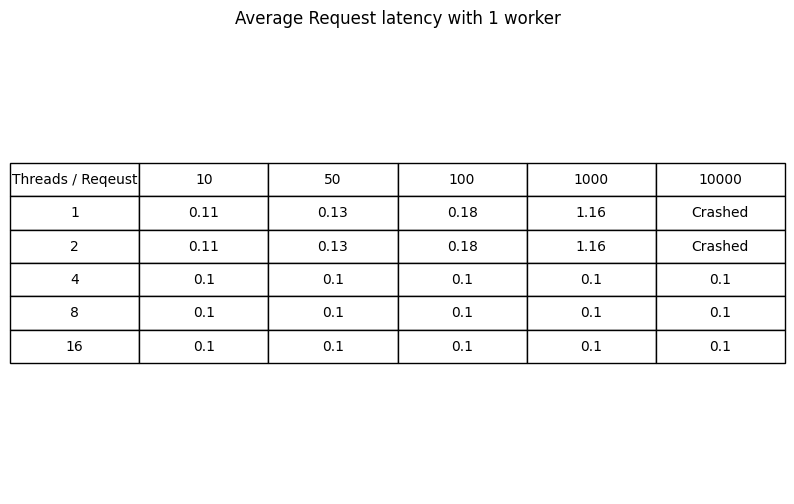

In [41]:
import matplotlib.pyplot as plt

# Sample Data
data = [
    ["Threads / Reqeust", "10", "50", "100", "1000", "10000"],
    [1, 0.11, 0.13, 0.18, 1.16, "Crashed"],
    [2, 0.11, 0.13, 0.18, 1.16, "Crashed"],
    [4, 0.11, 0.13, 0.18, 1.16, "Crashed"],
    [8, 0.11, 0.13, 0.18, 1.16, "Crashed"],
    [16, 0.11, 0.13, 0.18, 1.16, "Crashed"],
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
plt.title("Average Request latency with 1 worker")
table = plt.table(cellText=data, cellLoc='center', loc='center')

# Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)

# Show the table
plt.show()


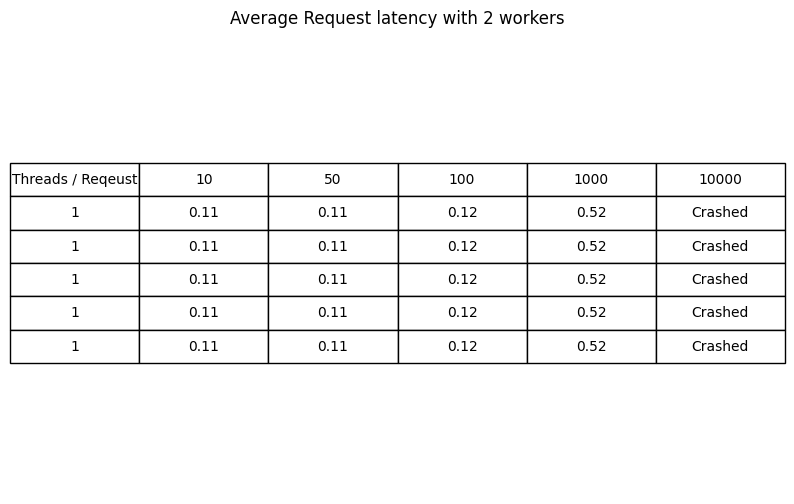

In [42]:
import matplotlib.pyplot as plt

# Sample Data
data = [
    ["Threads / Reqeust", "10", "50", "100", "1000", "10000"],
    [1, 0.11, 0.11, 0.12, 0.52, "Crashed"],
    [2, 0.11, 0.11, 0.12, 0.52, "Crashed"],
    [4, 0.11, 0.11, 0.12, 0.52, "Crashed"],
    [8, 0.11, 0.11, 0.12, 0.52, "Crashed"],
    [16, 0.11, 0.11, 0.12, 0.52, "Crashed"],
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
plt.title("Average Request latency with 2 workers")
table = plt.table(cellText=data, cellLoc='center', loc='center')

# Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)

# Show the table
plt.show()


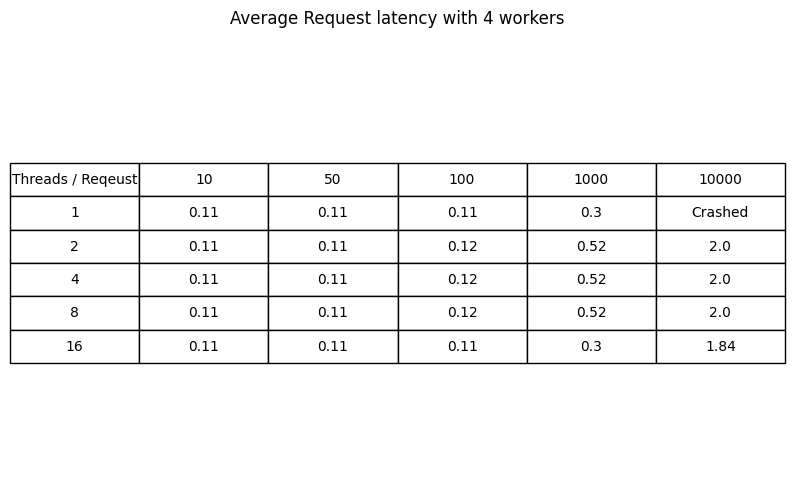

In [45]:
import matplotlib.pyplot as plt

# Sample Data
data = [
    ["Threads / Reqeust", "10", "50", "100", "1000", "10000"],
    [1, 0.11, 0.11, 0.11, 0.3, "Crashed"],
    [2, 0.11, 0.11, 0.12, 0.52, 2.0],
    [4, 0.11, 0.11, 0.12, 0.52, 2.0],
    [8, 0.11, 0.11, 0.12, 0.52, 2.0],
    [16, 0.11, 0.11, 0.11, 0.3, 1.84],
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
plt.title("Average Request latency with 4 workers")
table = plt.table(cellText=data, cellLoc='center', loc='center')

# Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)

# Show the table
plt.show()


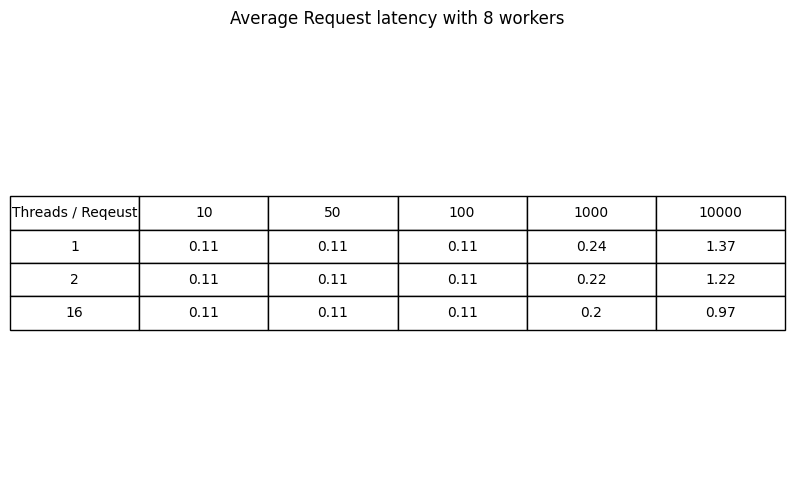

In [46]:
import matplotlib.pyplot as plt

# Sample Data
data = [
    ["Threads / Reqeust", "10", "50", "100", "1000", "10000"],
    [1, 0.11, 0.11, 0.11, 0.24, 1.37],
    [2, 0.11, 0.11, 0.11, 0.22, 1.22],
    [16, 0.11, 0.11, 0.11, 0.20, 0.97],
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
plt.title("Average Request latency with 8 workers")
table = plt.table(cellText=data, cellLoc='center', loc='center')

# Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)

# Show the table
plt.show()
